<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/rev5/S12/EVA4_S12_Solution_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement EVA 4, Session11 : CIFAR 10

**Target**: 


*  Write a code that draws this curve (without the arrows). In submission, you'll upload your drawn curve and code for that
    * 11s11.png 

  5. What is your test accuracy?

**Results**

*  Total Parameters = 6,573,120
*  After 24 Epochs, Final Train Accuracy = 95.75%
*  After 24 Epochs, Final Test Accuracy = 90.27%

**Analysis**

*  Target accuracy > 90% using Reset18 new architecture. Model performance is slightly overfitting.

## 1. Loading Module and Models 

In [1]:
# Load modules/models from EVA course
!rm -rf EVA4
!git clone -b rev5 https://github.com/sujitojha1/EVA4 -q --quiet
print("Loaded EVA4 Modules")

# For inline matplotlib plotting
%matplotlib inline

Loaded EVA4 Modules


In [2]:
%%sh 
chmod u+r+x ./EVA4/S12/load_data_and_modules.sh
./EVA4/S12/load_data_and_modules.sh

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




## 2. Loading train and test data with transforms and loader functions

In [3]:
from EVA4.Modules import *

# Loading test and train data & dataloader
tiny_imagenet = dataset_tiny_imagenet(batch_size=128)

# Train dataloader
trainloader = tiny_imagenet.loader(train_flag=True)

# Test dataloader
testloader = tiny_imagenet.loader(train_flag=False)

classes = tiny_imagenet.classes

  pip install torch-lr-finder -v --global-option="amp"


CUDA availability ? True


## 3. Exploratory Data Analysis

### 3.1 Summary Statistics

In [0]:
#tiny_imagenet.data_summary_stats()
#print(vars(train))

### 3.2 Plotting sample images

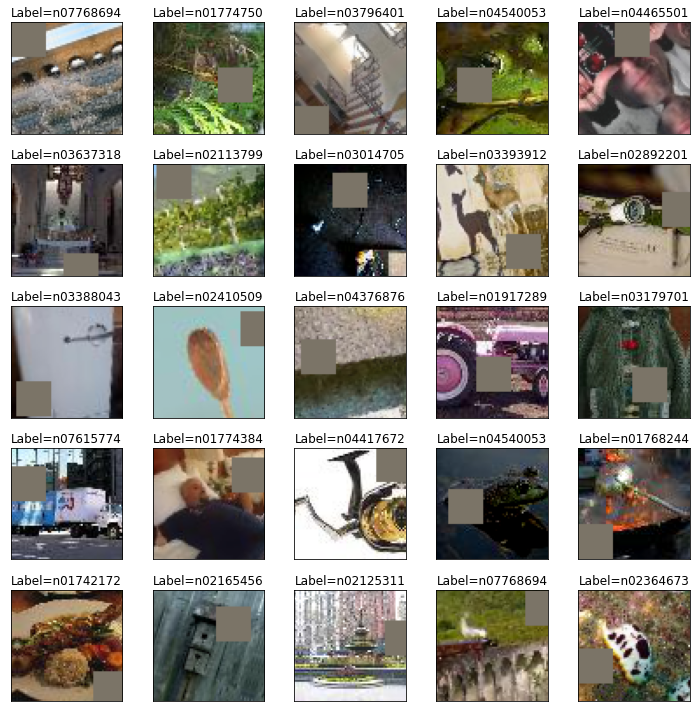

In [5]:
tiny_imagenet.sample_pictures(train_flag=True)

# The Model

In [6]:
from EVA4.Models import *

# Loading ResNet18 Model
net = ResNet18_tiny_imagenet()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


# Model Summary

In [7]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

# Define a Loss function and optimizer


Learning rate search finished. See the graph with {finder_name}.plot()


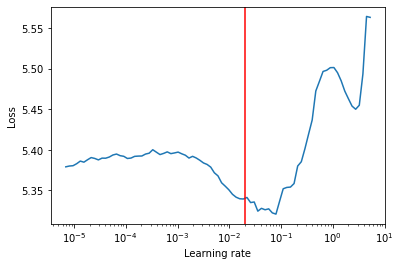

In [8]:
from EVA4.Modules import LRFinder
import torch.optim as optim

model = net
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-6, weight_decay=0.01,momentum=0.9)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=10, num_iter=100)
lr_finder.plot(show_lr=0.02) # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial stat

In [0]:
# import torch.optim as optim
# model = net
# criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.10, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,
                                          max_lr=0.02, 
                                          steps_per_epoch=571, 
                                          pct_start=0.20, 
                                          epochs=50,
                                          anneal_strategy='linear',
                                          base_momentum=0.8)

# Training and Testing

In [10]:
# Load train and test model
from EVA4.Modules import *

train = train()
test = test()

for epoch in range(50):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch,scheduler)
    test.execute(net, device, testloader, criterion)

print('Finished Training')

  0%|          | 0/571 [00:00<?, ?it/s]


Epoch: 0


  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0358, Accuracy: 2723/37000 (7.36%)


Epoch: 1


Loss=4.2944 Batch_id=570 LR=0.0046 Accuracy=11.11: 100%|██████████| 571/571 [02:18<00:00,  4.13it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0317, Accuracy: 4780/37000 (12.92%)


Epoch: 2


Loss=3.9126 Batch_id=570 LR=0.0066 Accuracy=17.06: 100%|██████████| 571/571 [02:18<00:00,  4.13it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0288, Accuracy: 6979/37000 (18.86%)


Epoch: 3


Loss=3.2663 Batch_id=570 LR=0.0085 Accuracy=21.75: 100%|██████████| 571/571 [02:18<00:00,  4.14it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0273, Accuracy: 8194/37000 (22.15%)


Epoch: 4


Loss=3.3995 Batch_id=570 LR=0.0104 Accuracy=25.84: 100%|██████████| 571/571 [02:18<00:00,  4.13it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0254, Accuracy: 9649/37000 (26.08%)


Epoch: 5


Loss=2.7207 Batch_id=570 LR=0.0123 Accuracy=29.47: 100%|██████████| 571/571 [02:17<00:00,  4.14it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 10804/37000 (29.20%)


Epoch: 6


Loss=3.1692 Batch_id=570 LR=0.0142 Accuracy=32.54: 100%|██████████| 571/571 [02:17<00:00,  4.14it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0225, Accuracy: 12285/37000 (33.20%)


Epoch: 7


Loss=2.5690 Batch_id=570 LR=0.0162 Accuracy=35.37: 100%|██████████| 571/571 [02:18<00:00,  4.13it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0228, Accuracy: 11943/37000 (32.28%)


Epoch: 8


Loss=2.5740 Batch_id=570 LR=0.0181 Accuracy=37.62: 100%|██████████| 571/571 [02:17<00:00,  4.14it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 14022/37000 (37.90%)


Epoch: 9


Loss=2.4289 Batch_id=570 LR=0.0200 Accuracy=39.64: 100%|██████████| 571/571 [02:18<00:00,  4.14it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Accuracy: 13008/37000 (35.16%)


Epoch: 10


Loss=2.1834 Batch_id=570 LR=0.0195 Accuracy=41.79: 100%|██████████| 571/571 [02:18<00:00,  4.13it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0212, Accuracy: 13891/37000 (37.54%)


Epoch: 11


Loss=2.3085 Batch_id=570 LR=0.0190 Accuracy=43.79: 100%|██████████| 571/571 [02:19<00:00,  4.10it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 14108/37000 (38.13%)


Epoch: 12


Loss=1.8024 Batch_id=570 LR=0.0185 Accuracy=45.57: 100%|██████████| 571/571 [02:19<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 15307/37000 (41.37%)


Epoch: 13


Loss=1.9402 Batch_id=570 LR=0.0180 Accuracy=47.34: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 16594/37000 (44.85%)


Epoch: 14


Loss=2.4049 Batch_id=570 LR=0.0175 Accuracy=48.80: 100%|██████████| 571/571 [02:18<00:00,  4.12it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 16004/37000 (43.25%)


Epoch: 15


Loss=2.5435 Batch_id=570 LR=0.0170 Accuracy=50.24: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 17131/37000 (46.30%)


Epoch: 16


Loss=1.7908 Batch_id=570 LR=0.0165 Accuracy=51.76: 100%|██████████| 571/571 [02:18<00:00,  4.12it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 17386/37000 (46.99%)


Epoch: 17


Loss=2.0469 Batch_id=570 LR=0.0160 Accuracy=52.83: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 17899/37000 (48.38%)


Epoch: 18


Loss=1.8155 Batch_id=570 LR=0.0155 Accuracy=54.25: 100%|██████████| 571/571 [02:18<00:00,  4.12it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 17415/37000 (47.07%)


Epoch: 19


Loss=1.9364 Batch_id=570 LR=0.0150 Accuracy=55.66: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 18463/37000 (49.90%)


Epoch: 20


Loss=1.9453 Batch_id=570 LR=0.0145 Accuracy=56.85: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0166, Accuracy: 18451/37000 (49.87%)


Epoch: 21


Loss=1.5973 Batch_id=570 LR=0.0140 Accuracy=57.98: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0164, Accuracy: 18644/37000 (50.39%)


Epoch: 22


Loss=2.2550 Batch_id=570 LR=0.0135 Accuracy=59.14: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0168, Accuracy: 18452/37000 (49.87%)


Epoch: 23


Loss=1.6627 Batch_id=570 LR=0.0130 Accuracy=60.16: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 18094/37000 (48.90%)


Epoch: 24


Loss=1.4184 Batch_id=570 LR=0.0125 Accuracy=61.59: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 19085/37000 (51.58%)


Epoch: 25


Loss=1.4386 Batch_id=570 LR=0.0120 Accuracy=62.69: 100%|██████████| 571/571 [02:18<00:00,  4.12it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 19757/37000 (53.40%)


Epoch: 26


Loss=1.3808 Batch_id=570 LR=0.0115 Accuracy=63.65: 100%|██████████| 571/571 [02:18<00:00,  4.13it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 19362/37000 (52.33%)


Epoch: 27


Loss=1.7086 Batch_id=570 LR=0.0110 Accuracy=64.89: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 19194/37000 (51.88%)


Epoch: 28


Loss=1.6712 Batch_id=570 LR=0.0105 Accuracy=65.66: 100%|██████████| 571/571 [02:18<00:00,  4.12it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 19412/37000 (52.46%)


Epoch: 29


Loss=1.3179 Batch_id=570 LR=0.0100 Accuracy=67.21: 100%|██████████| 571/571 [02:18<00:00,  4.12it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0164, Accuracy: 19624/37000 (53.04%)


Epoch: 30


Loss=1.0034 Batch_id=570 LR=0.0095 Accuracy=68.10: 100%|██████████| 571/571 [02:18<00:00,  4.12it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0160, Accuracy: 19754/37000 (53.39%)


Epoch: 31


Loss=1.0141 Batch_id=570 LR=0.0090 Accuracy=69.41: 100%|██████████| 571/571 [02:18<00:00,  4.13it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 20163/37000 (54.49%)


Epoch: 32


Loss=1.3928 Batch_id=570 LR=0.0085 Accuracy=70.32: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0156, Accuracy: 20282/37000 (54.82%)


Epoch: 33


Loss=1.0739 Batch_id=570 LR=0.0080 Accuracy=71.11: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0158, Accuracy: 20307/37000 (54.88%)


Epoch: 34


Loss=0.9106 Batch_id=570 LR=0.0075 Accuracy=72.48: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0158, Accuracy: 20051/37000 (54.19%)


Epoch: 35


Loss=1.1459 Batch_id=570 LR=0.0070 Accuracy=73.43: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0156, Accuracy: 20498/37000 (55.40%)


Epoch: 36


Loss=0.6837 Batch_id=570 LR=0.0065 Accuracy=74.71: 100%|██████████| 571/571 [02:19<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0158, Accuracy: 20633/37000 (55.76%)


Epoch: 37


Loss=1.2767 Batch_id=570 LR=0.0060 Accuracy=75.83: 100%|██████████| 571/571 [02:19<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0159, Accuracy: 20454/37000 (55.28%)


Epoch: 38


Loss=0.9365 Batch_id=570 LR=0.0055 Accuracy=76.62: 100%|██████████| 571/571 [02:18<00:00,  4.12it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 20751/37000 (56.08%)


Epoch: 39


Loss=1.2188 Batch_id=570 LR=0.0050 Accuracy=77.99: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0158, Accuracy: 20636/37000 (55.77%)


Epoch: 40


Loss=0.5173 Batch_id=570 LR=0.0045 Accuracy=79.15: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 20870/37000 (56.41%)


Epoch: 41


Loss=0.8819 Batch_id=570 LR=0.0040 Accuracy=80.38: 100%|██████████| 571/571 [02:19<00:00,  4.10it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 20882/37000 (56.44%)


Epoch: 42


Loss=0.8226 Batch_id=570 LR=0.0035 Accuracy=81.24: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 21073/37000 (56.95%)


Epoch: 43


Loss=0.4120 Batch_id=570 LR=0.0030 Accuracy=82.55: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0156, Accuracy: 21300/37000 (57.57%)


Epoch: 44


Loss=0.9594 Batch_id=570 LR=0.0025 Accuracy=83.59: 100%|██████████| 571/571 [02:19<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 21241/37000 (57.41%)


Epoch: 45


Loss=0.5841 Batch_id=570 LR=0.0020 Accuracy=84.87: 100%|██████████| 571/571 [02:18<00:00,  4.12it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0154, Accuracy: 21372/37000 (57.76%)


Epoch: 46


Loss=0.9645 Batch_id=570 LR=0.0015 Accuracy=86.31: 100%|██████████| 571/571 [02:18<00:00,  4.12it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0153, Accuracy: 21528/37000 (58.18%)


Epoch: 47


Loss=0.4998 Batch_id=570 LR=0.0010 Accuracy=87.19: 100%|██████████| 571/571 [02:18<00:00,  4.12it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0151, Accuracy: 21590/37000 (58.35%)


Epoch: 48


Loss=0.9497 Batch_id=570 LR=0.0005 Accuracy=88.33: 100%|██████████| 571/571 [02:19<00:00,  4.11it/s]
  0%|          | 0/571 [00:00<?, ?it/s]


Test set: Average loss: 0.0149, Accuracy: 21806/37000 (58.94%)


Epoch: 49


Loss=0.6226 Batch_id=570 LR=-0.0000 Accuracy=89.47: 100%|██████████| 571/571 [02:18<00:00,  4.11it/s]



Test set: Average loss: 0.0149, Accuracy: 21876/37000 (59.12%)

Finished Training


# Misclassified images


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


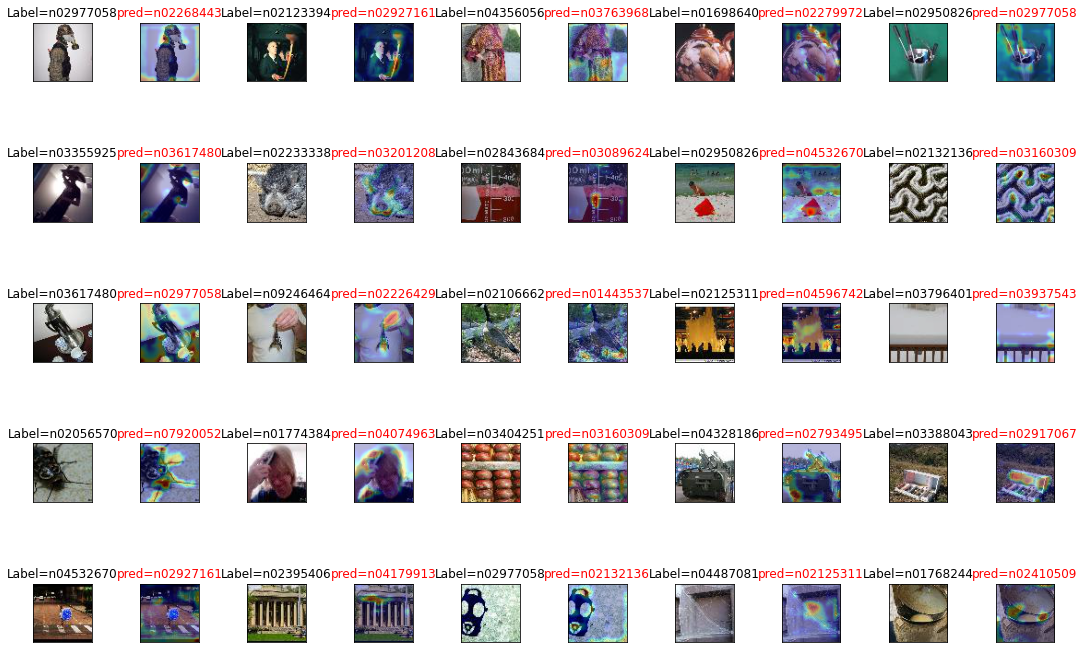

In [11]:
plot_misclassified_images_w_gradcam(net,device,testloader,classes)

# Plotting Train & Test Accuracy/Losses

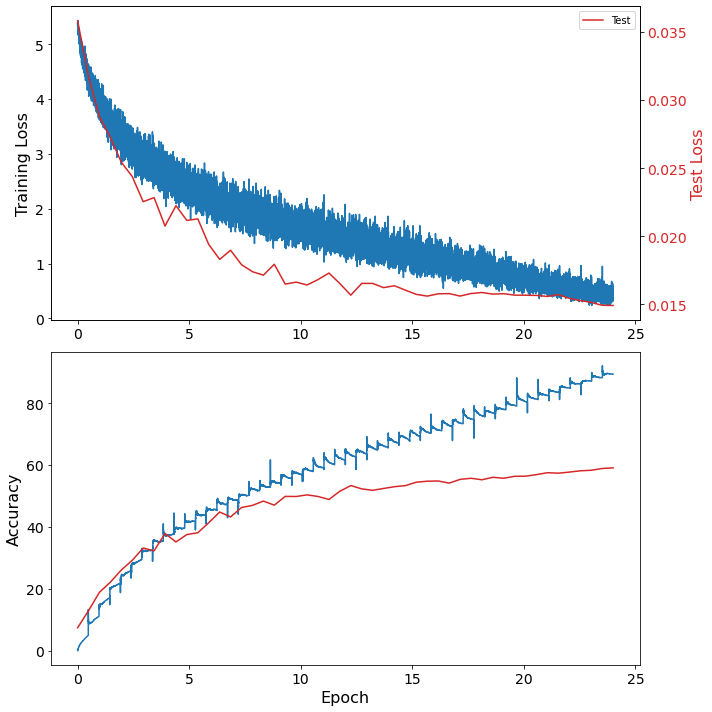

In [12]:
plot_train_test_acc_loss(train,test)